In [1]:
# Initialize the notebook
using Pkg
Pkg.activate("..")
#include("../src/Particles.jl")
using Particles
using Plots
using Zarr
using ZipFile

nothing

  Activating project at `d:\Projects\particles.jl`

- The interesting domain is approximately [3.90, 4.60]$^{\circ}$ X [51.70,52.04]$^{\circ}$ X [-40,0]m X [2\*3600,12\*3600]s
- The grid starts from the seabed. 
- z_center_3d and z_iface_3d are 3d coordinates that gives the location of cells. All of them are scaled by 0.01 and filled with -9999 at NaN values.
- salinity, x and y are filled with 9999 at NaN values and scaled by 0.01.

In [2]:
# unzip the flow data (if not already done)

# function unzip(file,exdir="")
# extract all files from zip file to exdir
function unzip(file,exdir="")
    fileFullPath = isabspath(file) ?  file : joinpath(pwd(),file)
    basePath = dirname(fileFullPath)
    outPath = (exdir == "" ? basePath : (isabspath(exdir) ? exdir : joinpath(pwd(),exdir)))
    isdir(outPath) ? "" : mkdir(outPath)
    zarchive = ZipFile.Reader(fileFullPath)
    for f in zarchive.files
        fullFilePath = joinpath(outPath,f.name)
        if (endswith(f.name,"/") || endswith(f.name,"\\"))
            mkdir(fullFilePath)
        else
            write(fullFilePath, read(f))
        end
    end
    close(zarchive)
end

if !isdir("data/ZUNORMM_map_fullgrid_v3.zarr") 
    unzip("data/ZUNORMM_map_fullgrid_v3.zip","")
end

In [2]:
Zarr_data = ZarrData("data","ZUNORMM_map_fullgrid_v3.zarr")
t0=get_reftime(Zarr_data)
h=initialize_interpolation(Zarr_data,"waterlevel",t0)
u=initialize_interpolation(Zarr_data,"x_velocity",t0)
v=initialize_interpolation(Zarr_data,"y_velocity",t0)
nu=initialize_interpolation(Zarr_data,"eddy_visc_z",t0)
s=initialize_interpolation(Zarr_data,"salinity",t0)

nothing

In [10]:
# find the extent of the data
xy_bbox=Zarr_data.xy_grid.bbox
println("bbox=$(xy_bbox)") #bbox=[3.4773802907221345, 5.566420993890162, 51.66065856527758, 52.466444933890344]

#z0=Zarr_data.z_iface_3d[:,:,:,1]
#z0[z0.<-9990].=0.0
#minz = minimum(z0) #scaled
#println("minz=$(minz)")
#maxx = maximum(x)
#minx,
#z[1,1,:,1]
#size(z)
#z0[:,:,30]
#z0=Zarr_data.Variables["z_iface_3d"][:,:,:,1]
z0=Zarr_data.file.arrays["z_iface_3d"][:,:,:,1]
z0_scaled=0.01*z0
z0_max=maximum(z0_scaled,dims=3)
display(z0_max)
p = heatmap(z0_max[:,:,1]',clim=(-40,5))
display(p)
z0_scaled[z0.<-9990].=0.0
z0_min=minimum(z0_scaled,dims=3)
display(z0_min)
p = heatmap(z0_min[:,:,1]')
display(p)
display(Zarr_data.file.arrays["z_iface_3d"].attrs)

#Zarr_data.file.arrays["z_iface_3d"].attrs
t=Zarr_data.file.arrays["time"][:] #"seconds since 2022-04-01 00:00:00 +00:00"
t0,(t[2]-t[1])/3600.0, (t[end]-t[2])/3600.0/24.0 #2022-04-16 step=2hrs until 2022-05-01

Zarr_data.file.arrays["salinity"].attrs

In [5]:
Zarr_data.file.arrays["x_center"][1],Zarr_data.file.arrays["x_center"][end]

(3.901002865329513, 4.598997134670487)

In [6]:
Zarr_data.file.arrays["y_center"][1],Zarr_data.file.arrays["y_center"][end]

(51.70050143266476, 52.04949856733524)

In [7]:
Zarr_data.file.arrays["x_velocity"][50,300,:,1]    # existential cell starts from the bottom

46-element Vector{Int16}:
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
    ⋮
  600
  605
  609
  612
  611
  604
  589
  563
  530

In [8]:
Zarr_data.file.arrays["x_velocity"].attrs   

Dict{String, Any} with 12 entries:
  "cell_methods"      => "mesh2d_nFaces: mean"
  "long_name"         => "Flow element center velocity vector, x-component"
  "scale_factor"      => 0.001
  "location"          => "face"
  "add_offset"        => 0.0
  "standard_name"     => "eastward_sea_water_velocity"
  "coordinates"       => "time z_center_3d y_center x_center"
  "mesh"              => "mesh2d"
  "_FillValue"        => 9999
  "units"             => "m s-1"
  "_ARRAY_DIMENSIONS" => Any["time", "z", "y", "x"]
  "grid_mapping"      => "wgs84"

In [9]:
Zarr_data.file.arrays["y_velocity"][50,300,:,1]    # existential cell starts from the bottom

46-element Vector{Int16}:
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
    ⋮
   81
  106
  128
  151
  173
  193
  208
  220
  227

In [10]:
Zarr_data.file.arrays["y_velocity"].attrs   

Dict{String, Any} with 12 entries:
  "cell_methods"      => "mesh2d_nFaces: mean"
  "long_name"         => "Flow element center velocity vector, y-component"
  "scale_factor"      => 0.001
  "location"          => "face"
  "add_offset"        => 0.0
  "standard_name"     => "northward_sea_water_velocity"
  "coordinates"       => "time z_center_3d y_center x_center"
  "mesh"              => "mesh2d"
  "_FillValue"        => 9999
  "units"             => "m s-1"
  "_ARRAY_DIMENSIONS" => Any["time", "z", "y", "x"]
  "grid_mapping"      => "wgs84"

In [11]:
Zarr_data.file.arrays["z_velocity_center"][50,300,:,1]    # existential cell starts from the bottom

46-element Vector{Int16}:
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
    ⋮
  -15
  -22
  -23
  -23
  -23
  -21
  -20
    2
    2

In [12]:
Zarr_data.file.arrays["z_velocity_center"].attrs   

Dict{String, Any} with 12 entries:
  "cell_methods"      => "mesh2d_nFaces: mean"
  "long_name"         => "Flow element center velocity vector, z-component"
  "scale_factor"      => 0.0001
  "location"          => "face"
  "add_offset"        => 0.0
  "standard_name"     => "upward_sea_water_velocity"
  "coordinates"       => "time z_center_3d y_center x_center"
  "mesh"              => "mesh2d"
  "_FillValue"        => 9999
  "units"             => "m s-1"
  "_ARRAY_DIMENSIONS" => Any["time", "z", "y", "x"]
  "grid_mapping"      => "wgs84"

349×349×1 Array{Float64, 3}:
[:, :, 1] =
  0.0    0.0    0.0    0.0    0.0   …  -2.31  -2.31  -2.31  -2.31  -2.31
  0.0    0.0    0.0    0.0    0.0      -2.31  -2.31  -2.31  -2.31  -2.31
  0.0    0.0    0.0    0.0    0.0      -2.31  -2.31  -2.31  -2.31  -2.31
  0.0    0.0    0.0    0.0    0.0      -2.31  -2.31  -2.31  -2.31  -2.31
  0.0    0.0    0.0    0.0    0.0      -2.31  -2.31  -2.31  -2.31  -2.31
  0.0    0.0    0.0    0.0    0.0   …  -2.53  -2.31  -2.31  -2.31  -2.31
  0.0    0.0    0.0    0.0    0.0      -2.53  -2.41  -2.41  -2.31  -2.3
  0.0    0.0    0.0    0.0    0.0      -2.41  -2.41  -2.41  -2.34  -2.34
  0.0    0.0    0.0    0.0    0.0      -2.41  -2.41  -2.34  -2.34  -2.34
  0.0    0.0    0.0    0.0    0.0      -2.41  -2.34  -2.34  -2.34  -2.34
  ⋮                                 ⋱          ⋮                   
 -0.49  -0.65  -0.65  -0.65  -0.8   …   0.0    0.0    0.0    0.0    0.0
 -0.49  -0.65  -0.65  -0.65  -0.65      0.0    0.0    0.0    0.0    0.0
 -0.39  -0.39  -0.

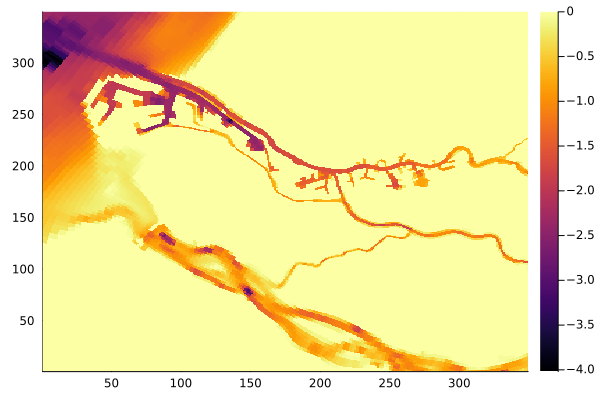

Dict{String, Any} with 13 entries:
  "cell_methods"      => "mesh2d_nFaces: mean"
  "long_name"         => "Vertical coordinate of layer centres at pressure poin…
  "scale_factor"      => 0.1
  "location"          => "face"
  "add_offset"        => 0.0
  "standard_name"     => "altitude"
  "coordinates"       => "time z_center_3d y_center x_center"
  "mesh"              => "mesh2d"
  "_FillValue"        => -9999.0
  "units"             => "m"
  "_ARRAY_DIMENSIONS" => Any["time", "z", "y", "x"]
  "grid_mapping"      => "wgs84"
  "bounds"            => "mesh2d_flowelem_zcc_bnd"

In [13]:
z0=Zarr_data.file.arrays["z_center_3d"][:,:,:,1]
z0_scaled=0.01*z0
z0_scaled[z0.<-9990].=0.0
z0_min=minimum(z0_scaled,dims=3)
display(z0_min)
p = heatmap(z0_min[:,:,1]')
display(p)

Zarr_data.file.arrays["z_center_3d"].attrs


t=0.0 

t=7200.0 t=14400.0 

t=21600.0 

t=28800.0 

t=36000.0 

t=43200.0 

┌ Info: Saved animation to d:\Projects\particles.jl\case_zunormm\rmm.gif
└ @ Plots C:\Users\hugo1\.julia\packages\Plots\3BCH5\src\animation.jl:156


Plots.AnimatedGif("d:\\Projects\\particles.jl\\case_zunormm\\rmm.gif")
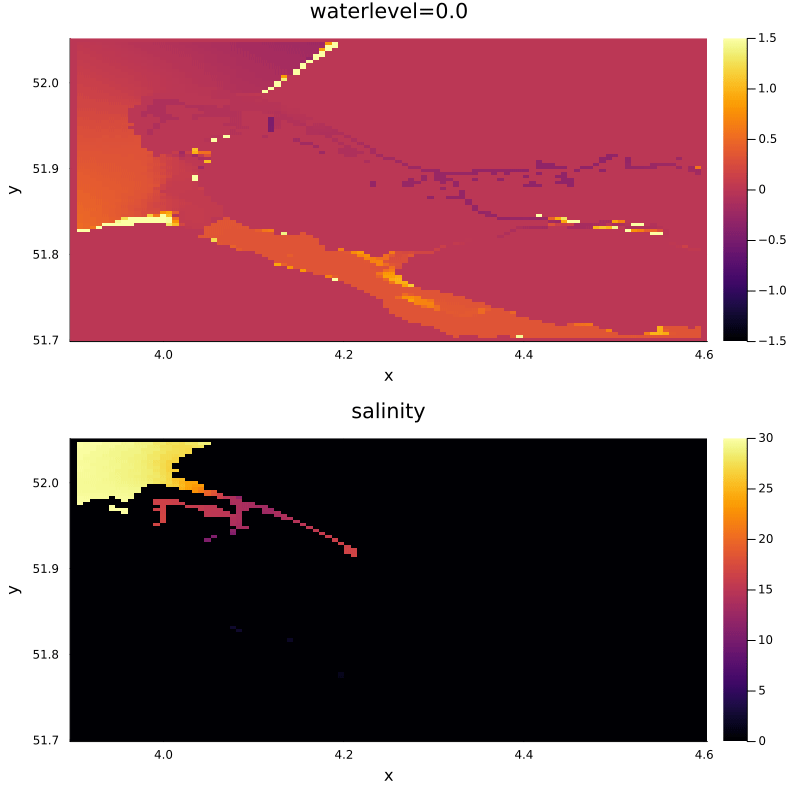

In [14]:
x_left = 3.9
x_right = 4.6
y_bot = 51.7
y_top = 52.05
z_surface = 0.0
z_bottom = -40.0
t_start=0.0
t_step=2*3600.0
#t_stop=15*24*3600.0 # end of dataset at 15 days
t_stop=12*3600.0 # 12 hours

# This is using the interpolation functions instead of plotting the data directly, which is much faster.
anim = @animate for t in range(t_start, stop = t_stop, step = t_step)
    if t%1200==0 print("t=$(t) ") end
    # grid for plotting only
    x_points = range(x_left,stop=x_right,length=100) #only show 100 points in x
    y_points = range(y_bot,stop=y_top,length=100)
    z        = -2.0
    #u_interp = [u(x,y_middle,z,t) for x in x_points, z in z_points] # x velocity
    h_interp = [h(x,y,z,t) for x in x_points, y in y_points] # water level
    s_interp = [s(x,y,z,t) for x in x_points, y in y_points] # salinity

    l = @layout([a; b])
    p1=heatmap(x_points,y_points,h_interp',xlabel="x",ylabel="y",title="waterlevel=$(t)",clims=(-1.5,1.5))
    p2=heatmap(x_points,y_points,s_interp',xlabel="x",ylabel="y",title="salinity",clims=(0,30))
    plot(p1,p2,layout=l,size=(800,800))
end

# save the animation as a gif
# note that we keep the resolution low because the data is being interpolated on the fly
gif(anim, "./rmm.gif", fps = 3)


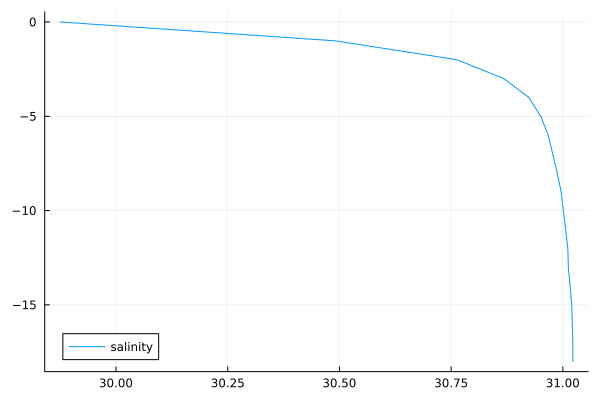

In [15]:
# plot a profile 
xp=4.0
yp=52.0
tp=2*3600.0
z_points=collect(-18.0:1.0:0.0)
s_profile = [s(xp,yp,z,tp) for z in z_points] # salinity

plot(s_profile,z_points,label="salinity")

In [16]:
Zarr_data.file.arrays["z_iface_3d"][1,end,:,1]


47-element Vector{Int16}:
 -9999
 -9999
 -9999
 -9999
 -9999
 -9999
 -9999
 -9999
 -9999
 -9999
     ⋮
   -50
   -44
   -37
   -31
   -25
   -19
   -12
    -6
     0

In [21]:
# direct plot of surface salinity at first time step - faster and nicer than using interpolation

s0=Zarr_data.file.arrays["salinity"][:,:,46,1] #999 x 499 x 46 x 181
s0_scaled=0.01*s0
s0_scaled[s0 .> 9990].=NaN
x=Zarr_data.file.arrays["x_center"][:]
y=Zarr_data.file.arrays["y_center"][:]

heatmap(x,y,s0_scaled',aspect_ratio=:equal,clim=(0,40),color=:viridis,size=(1400,800))
savefig("./surface_salinity.png")

"d:\\Projects\\particles.jl\\case_zunormm\\surface_salinity.png"

In [18]:
Zarr_data.file.arrays["eddy_visc_z"].attrs

Dict{String, Any} with 12 entries:
  "cell_methods"      => "mesh2d_nEdges: mean"
  "long_name"         => "turbulent vertical eddy viscosity"
  "scale_factor"      => 1.0e-6
  "location"          => "edge"
  "add_offset"        => 0.0
  "standard_name"     => "eddy_viscosity"
  "coordinates"       => "time z_iface_3d y_center x_center"
  "mesh"              => "mesh2d"
  "_FillValue"        => 9999
  "units"             => "m2 s-1"
  "_ARRAY_DIMENSIONS" => Any["time", "z_iface", "y", "x"]
  "grid_mapping"      => "wgs84"

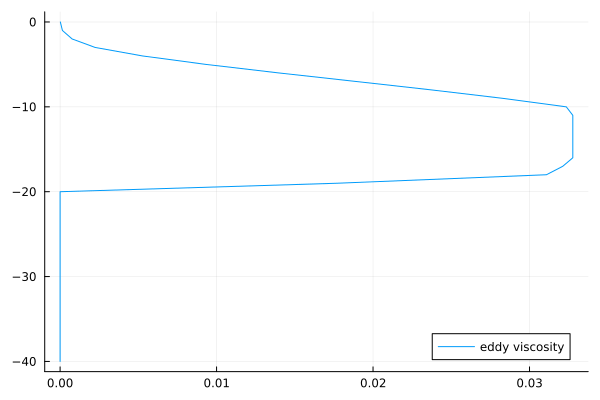

In [19]:
# plot a profile 
xp=4.0
yp=52.0
tp=2*3600.0
z_points=collect(-40.0:1.0:0.0)
K_profile = [nu(xp,yp,z,tp) for z in z_points] # salinity

plot(K_profile,z_points,label="eddy viscosity")